In [1]:
import os
import glob
import pandas as pd
import subprocess

import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import qutip.testing

from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

from scipy.interpolate import interp1d

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_7790/1302415469.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


69
69


Text(0.5, -0.05, 'For 780 nm VCSEL.')

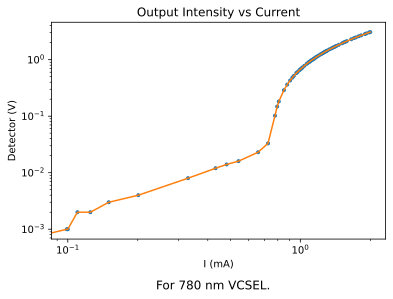

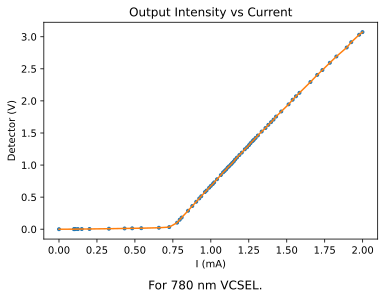

In [2]:

laser_power_mA = np.array([0,0.099,0.1,0.11,0.125,0.15,0.201,0.329,0.432,0.482,0.542,0.658,0.726,0.778,
                        0.795,0.808,0.850,0.878,0.904,0.924,0.937,0.961,0.972,0.989,1.00,1.013,1.022,
                        1.041,1.066,1.081,1.091,1.101,1.111,1.120,1.132,1.141,1.151,1.160,1.172,1.188,
                        1.204,1.224,1.239,1.252,1.262,1.275,1.283,1.295,1.310,1.335,1.360,1.379,1.397,
                        1.413,1.430,1.464,1.512,1.539,1.561,1.584,1.656,1.701,1.735,1.784,1.827,1.895,
                        1.925,1.977,1.999])

print(len(laser_power_mA))

offset = 0.384

detector_mV = np.array([0.384,0.385,0.385,0.386,0.386,0.387,0.388,0.392,0.396,0.398,0.4,0.407,0.417,0.486,0.532,
                        0.566,0.672,0.746,0.812,0.864,0.898,0.963,0.987,1.031,1.059,1.089,1.114,1.163,1.228,
                        1.270,1.292,1.316,1.345,1.365,1.392,1.416,1.440,1.470,1.500,1.540,1.578,1.630,1.662,
                        1.696,1.726,1.758,1.777,1.807,1.845,1.906,1.961,2.011,2.053,2.092,2.140,2.219,2.330,
                        2.402,2.456,2.51,2.678,2.789,2.865,2.978,3.076,3.216,3.299,3.415,3.456])

print(len(detector_mV))

# Making plots look neater
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ip_ds_1 = interp1d(laser_power_mA, detector_mV - offset, kind='cubic')

fig = plt.figure()
plt.plot(laser_power_mA,detector_mV-offset,'.')
plt.plot(laser_power_mA,ip_ds_1(laser_power_mA))
plt.yscale('log')
plt.xscale('log')
plt.title("Output Intensity vs Current")
plt.xlabel("I (mA)")
plt.ylabel("Detector (V)")
caption="For 780 nm VCSEL."
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)

fig = plt.figure()
plt.plot(laser_power_mA,detector_mV - offset,'.')
plt.plot(laser_power_mA,ip_ds_1(laser_power_mA))
plt.title("Output Intensity vs Current")
plt.xlabel("I (mA)")
plt.ylabel("Detector (V)")
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)

#stylize_axes(ax)

Data plotted in the above figures was collected with minimum sensitivity on the photodector. Unforunately more data was not collected because the laser got damaged.

It was observed that the intensity (V) reading peaked at 6.8 V and then started droppingo off with increase in current. This may have been due to the laser being broken. If all equipment was working correctly, the intensity would have kept increasing and reached a saturation point. 



Text(0.5, -0.05, 'For 850 nm VCSEL.')

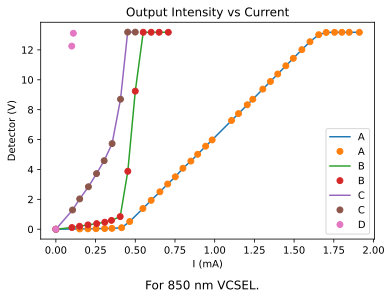

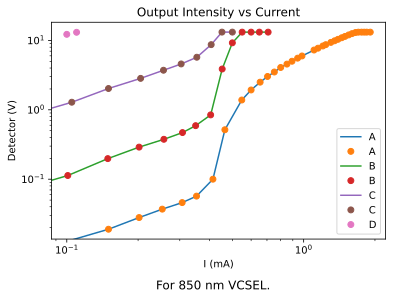

In [3]:
# data-set 2
# VCSEL 850 nm

ds2_offset_A = 0.434
ds2_mA_A = np.array([0,0.15,0.202,0.253,0.307,0.353,0.414,0.465,0.548,0.6,0.655,0.704,0.752,0.8,0.85,0.893,0.943,0.984,
                        1.106,1.150,1.205,1.240,1.303,1.351,1.397,1.448,1.495,1.549,1.600,1.655,1.702,1.755,1.801,1.847,1.911])
ds2_V_A = np.array([0.434,0.453,0.462,0.471,0.480,0.491,0.534,0.950,1.819,2.367,2.938,3.460,3.942,4.512,4.994,5.45,5.99,6.41,
                    7.71,8.17,8.76,9.13,9.81,10.32,10.82,11.37,11.87,12.45,12.98,13.45,13.60,13.61,13.61,13.61,13.61])

ds2_offset_B = 0.431
ds2_mA_B = np.array([0.,0.101,0.149,0.202,0.257,0.308,0.35,0.405,0.453,0.5,0.55,0.6,0.65,0.708])
ds2_V_B = np.array([0.431,0.544,0.629,0.721,0.807,0.901,1.022,1.276,4.307,9.67,13.61,13.61,13.61,13.61])

ds2_offset_C = 0.421
ds2_mA_C = np.array([0,0.105,0.15,0.205,0.256,0.304,0.354,0.407,0.452,0.5])
ds2_V_C = np.array([0.421,1.708,2.45,3.262,4.142,5.006,6.150,9.12,13.61,13.61])

ds2_offset_D = 0.497
ds2_mA_D = np.array([0,0.1,0.11])
ds2_V_D = np.array([0.497,12.75,13.61])

#ds2_V = np.concatenate((ds2_V_A-ds2_offset_A),(ds2_V_B-ds2_offset_B),(ds2_V_C-ds2_offset_C),(ds2_V_D-ds2_offset_D))
#ds2_mA = np.concatenate((ds2_mA_A),(ds2_mA_B),(ds2_mA_C),(ds2_mA_D))

ip_ds_2_A = interp1d(ds2_mA_A,ds2_V_A - ds2_offset_A, kind='cubic')
ip_ds_2_B = interp1d(ds2_mA_B,ds2_V_B - ds2_offset_B, kind='cubic')
ip_ds_2_C = interp1d(ds2_mA_C,ds2_V_C - ds2_offset_C, kind='cubic')

# error with D not fixed
#ip_ds_2_D = interp1d(ds2_mA_D,ds2_V_D, kind='cubic') 

plt.figure()
plt.plot(ds2_mA_A, ip_ds_2_A(ds2_mA_A))
plt.plot(ds2_mA_A,ds2_V_A - ds2_offset_A ,'o')
plt.plot(ds2_mA_B, ip_ds_2_B(ds2_mA_B))
plt.plot(ds2_mA_B,ds2_V_B - ds2_offset_B,'o')
plt.plot(ds2_mA_C, ip_ds_2_C(ds2_mA_C))
plt.plot(ds2_mA_C,ds2_V_C - ds2_offset_C,'o')
#plt.plot(ds2_mA_D, ip_ds_2_D(ds2_mA_D))
plt.plot(ds2_mA_D,ds2_V_D - ds2_offset_D,'o')
plt.legend(['A','A','B','B','C','C','D'])
plt.title("Output Intensity vs Current")
plt.xlabel("I (mA)")
plt.ylabel("Detector (V)")

txt="For 850 nm VCSEL."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.figure()
plt.plot(ds2_mA_A, ip_ds_2_A(ds2_mA_A))
plt.plot(ds2_mA_A,ds2_V_A - ds2_offset_A ,'o')
plt.plot(ds2_mA_B, ip_ds_2_B(ds2_mA_B))
plt.plot(ds2_mA_B,ds2_V_B - ds2_offset_B,'o')
plt.plot(ds2_mA_C, ip_ds_2_C(ds2_mA_C))
plt.plot(ds2_mA_C,ds2_V_C - ds2_offset_C,'o')
#plt.plot(ds2_mA_D, ip_ds_2_D(ds2_mA_D))
plt.plot(ds2_mA_D,ds2_V_D - ds2_offset_D,'o')
plt.legend(['A','A','B','B','C','C','D'])
plt.yscale('log')
plt.xscale('log')
plt.title("Output Intensity vs Current")
plt.xlabel("I (mA)")
plt.ylabel("Detector (V)")
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

In [7]:
# exporting data to csvs

# for ds1
np.savetxt("data-set-1-I-780nm",laser_power_mA, delimiter=',' )
np.savetxt("data-set-1-V-780nm",detector_mV, delimiter=',' )

#for ds2
np.savetxt("data-set-2A-I-850nm",ds2_mA_A, delimiter=',' )
np.savetxt("data-set-2A-V-850nm",ds2_V_A, delimiter=',' )

np.savetxt("data-set-2B-I-850nm",ds2_mA_B, delimiter=',' )
np.savetxt("data-set-2B-V-850nm",ds2_V_B, delimiter=',' )

np.savetxt("data-set-2C-I-850nm",ds2_mA_C, delimiter=',' )
np.savetxt("data-set-2C-V-850nm",ds2_V_C, delimiter=',' )

Notes for later : 

[Interactive Data Visualisation Tutorial](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)

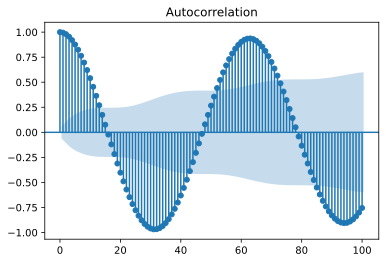

<Figure size 432x288 with 0 Axes>

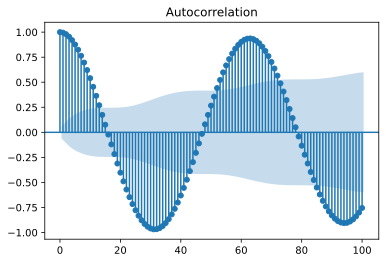

In [8]:
series = np.linspace(0,100,1000)
sine = np.sin(series)

#plt.plot(series,sine)
fig = plt.figure()
plot_acf(sine,lags=100)


In [ ]:
x_t = 2+8+1
 
Bo = 1+ x_t/100
Be = 1.1 * (1 + x_t/75)

def no(Wvs):
    return np.sqrt(1 + Bo/(1 - 0.05/Wvs**2))

def ne(Wvs):
    return np.sqrt(1 + Be/(1 - 0.16/Wvs**2))


lam = np.array([600,1000,1200,1500])*(10**-9)/10**-6

nos = no(lam)
nes = ne(lam) 

lams = [600,1000,1200,1500]

for i in range(len(lams)):
    
    print('n_o for {:}nm = {:.4f}'.format(lams[i],nos[i]))
    
print('\n')

for i in range(len(lams)):
    
    print('n_e for {:}nm = {:.4f}'.format(lams[i],nes[i]))

n_o for 600nm = 1.5130
n_o for 1000nm = 1.4726
n_o for 1200nm = 1.4663
n_o for 1500nm = 1.4612


n_e for 600nm = 1.8084
n_e for 1000nm = 1.5816
n_e for 1200nm = 1.5553
n_e for 1500nm = 1.5355
